<a href="https://colab.research.google.com/github/PyBeginner1/AirQualityPrediction/blob/main/AirQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import shap

In [10]:
data= pd.read_csv('/content/air.csv', names = ['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'CO2'])

In [11]:
data

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MQ1     1845 non-null   int64
 1   MQ2     1845 non-null   int64
 2   MQ3     1845 non-null   int64
 3   MQ4     1845 non-null   int64
 4   MQ5     1845 non-null   int64
 5   MQ6     1845 non-null   int64
 6   CO2     1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


# Preprocessing

Splitting Features & target

In [25]:
X = data.drop('CO2', axis = 1)
Y = data['CO2']


Train & test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, shuffle = True, random_state = 1)

In [27]:
X.shape, X_train.shape, X_test.shape

((1845, 6), (1291, 6), (554, 6))

# Model

In [40]:
model = RandomForestClassifier(random_state= 1)

model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
acc = model.score(X_test, Y_test)
print('Accuracy : {:.2f}%'.format(acc * 100))

Accuracy : 94.40%


# Feature Impact with SHAP values

In [34]:
model.classes_

array([1, 2, 3, 4])

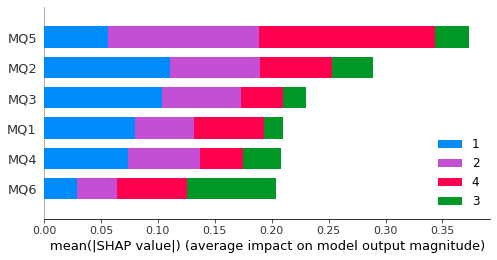

In [37]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names = model.classes_)

In [38]:
model = RandomForestClassifier(random_state= 1)
model.fit(X_train.drop('MQ5', axis =1), Y_train)
acc = model.score(X_test.drop('MQ5', axis = 1), Y_test)
print('Accuracy : {:.2f}%'.format(acc * 100))

Accuracy : 92.78%


In [39]:
model = RandomForestClassifier(random_state= 1)
model.fit(X_train.drop('MQ2', axis =1), Y_train)
acc = model.score(X_test.drop('MQ2', axis = 1), Y_test)
print('Accuracy : {:.2f}%'.format(acc * 100))

Accuracy : 94.95%


1 - Normal situation<br />
2 - Preparing meals<br /> 
3 - Presence of smoke<br />
4 - Cleaning<br />

# Make a Predictive System

In [44]:
input_data = (670,	696,	1252,	1720,	1321,	2431)

input_numpy = np.asarray(input_data)
input_reshape = input_numpy.reshape(1, -1)

score = model.predict(input_reshape)
score[0]

4